### Rendering of `Panda`

In [1]:
import mujoco_py
import numpy as np
import matplotlib.pyplot as plt
from mujoco_parser import MuJoCoParserClass
from util import rpy2r,pr2t,t2pr
np.set_printoptions(precision=2)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("Ready.")

Ready.


### Parse `Panda`

In [2]:
env = MuJoCoParserClass(name='Panda',xml_path='../asset/panda/franka_panda.xml')
print ("[%s] parsed."%(env.name))

[Panda] parsed.


### Get camera pose

In [3]:
env.init_viewer(window_width=0.5,window_height=0.5,
                cam_azimuth=100.0,cam_distance=3.0,
                cam_elevation=-22.0,cam_lookat=np.array([0.3,0.0,1.0]))

# Render
env.set_viewer(
    cam_azimuth   = 0,
    cam_distance  = 10,
    cam_elevation = -45, # -90~+90
    cam_lookat    = [0,0,0]
)

env.reset()
max_tick = 5000
while env.tick < max_tick:
    # Update
    env.step()
    
    # Get camera info
    vi = env.get_viewer_info()
    p_viewer = vi['cam_lookat']
    R_viewer = rpy2r(np.deg2rad([0,-vi['cam_elevation'],vi['cam_azimuth']]))
    T_viewer = pr2t(p_viewer,R_viewer)
    T_marker = T_viewer @ pr2t(np.array([-2,0,0]),np.eye(3)) # minus translate w.r.t. x
    p_marker,R_marker = t2pr(T_marker)
    
    # Plot coordinate
    env.add_marker_coordinate(
        p=[0,0,0],R=np.eye(3),axis_len=1.0,axis_width=0.01,label='World')
    env.add_marker_coordinate(
        p=p_viewer,R=R_viewer,axis_len=2,axis_width=0.05,label='')
    env.add_marker_sphere(
        p=p_marker,radius=0.1,rgba=[1,0,0,1])
    
    # Render
    tick_rate = env.tick / max_tick
    MOVE_CAMERA = False
    if MOVE_CAMERA:
        env.set_viewer(
            cam_azimuth   = 360.0*tick_rate,
            cam_elevation = 0.0*tick_rate - 45
        )
    
    env.render() 
print ("Done.")

Creating window glfw
Done.


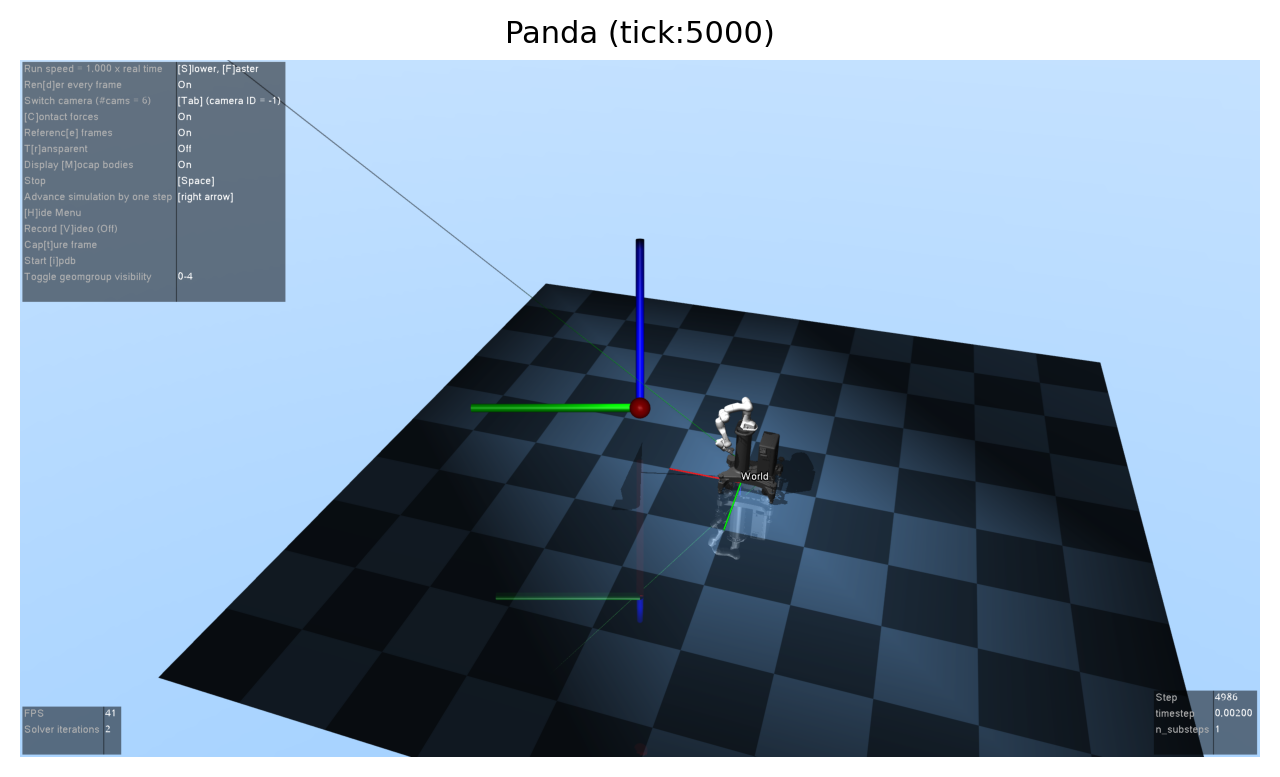

In [4]:
env.plot_scene(figsize=(8,5),render_expand=2.0,title_str='Panda (tick:%d)'%(env.tick),title_fs=11)

### Render with markers

In [5]:
env.init_viewer(window_width=0.5,window_height=0.5,
                cam_azimuth=100.0,cam_distance=3.0,
                cam_elevation=-22.0,cam_lookat=np.array([0.3,0.0,1.0]))
env.reset()
max_tick = 5000
while env.tick < max_tick:
    # Update
    env.step()
    
    # Get p and R of an end-effector
    p_eef = env.get_p_body(body_name='panda_eef')
    R_eef = env.get_R_body(body_name='panda_eef')
    
    # Plot plane
    p_plane = [1.0,0.0,0.1]
    R_plane = np.eye(3)
    env.add_marker_plane(
        p=p_plane,R=R_plane,xy_widths=[0.5,0.5],rgba=[0.0,1.0,1.0,0.9],label='Plane')
    
    # Plot sphere
    p_sphere = [1.0,0.0,0.25]
    env.add_marker_sphere(
        p=p_sphere,radius=0.05,rgba=[1.0,0.0,0.0,0.9],label='Sphere')
    
    # Plot box
    p_box = [1.0,0.0,0.5]
    R_box = R_eef # np.eye(3)
    env.add_marker_box(
        p=p_box,R=R_box,size=[0.025,0.025,0.1],rgba=[0.0,1.0,0.0,0.9],label='Box')
    
    # Plot capsule
    p_capsule = [1.0,0.0,0.75]
    R_capsule = R_eef # np.eye(3)
    env.add_marker_capsule(
        p=p_capsule,R=R_capsule,size=[0.025,0.025,0.1],rgba=[0.0,0.0,1.0,0.9],label='Capsule')
        
    # Plot cylinder
    p_cylinder = [1.0,0.0,1.0]
    R_cylinder = R_eef # np.eye(3)
    env.add_marker_cylinder(
        p=p_cylinder,R=R_cylinder,size=[0.025,0.025,0.1],rgba=[1.0,1.0,0.0,0.9],label='Cylinder')
    
    # Plot arrow
    p_arrow = [1.0,0.0,1.25]
    R_arrow = R_eef # np.eye(3)
    env.add_marker_arrow(
        p=p_arrow,R=R_arrow,size=[0.025,0.025,0.25],rgba=[1.0,0.0,1.0,0.9],label='Arrow')
    
    # Plot coordinate
    p_coord    = [1.0,0.0,1.5]
    R_coord    = R_eef # rpy2r(np.deg2rad([0,0,0]))
    env.add_marker_coordinate(
        p=p_coord,R=R_coord,axis_len=0.5,axis_width=0.01,label='Coordinate')
    env.add_marker_coordinate(
        p=[0,0,0],R=np.eye(3),axis_len=1.0,axis_width=0.01,label='World')
    
    env.render()
print ("Done.")

Done.


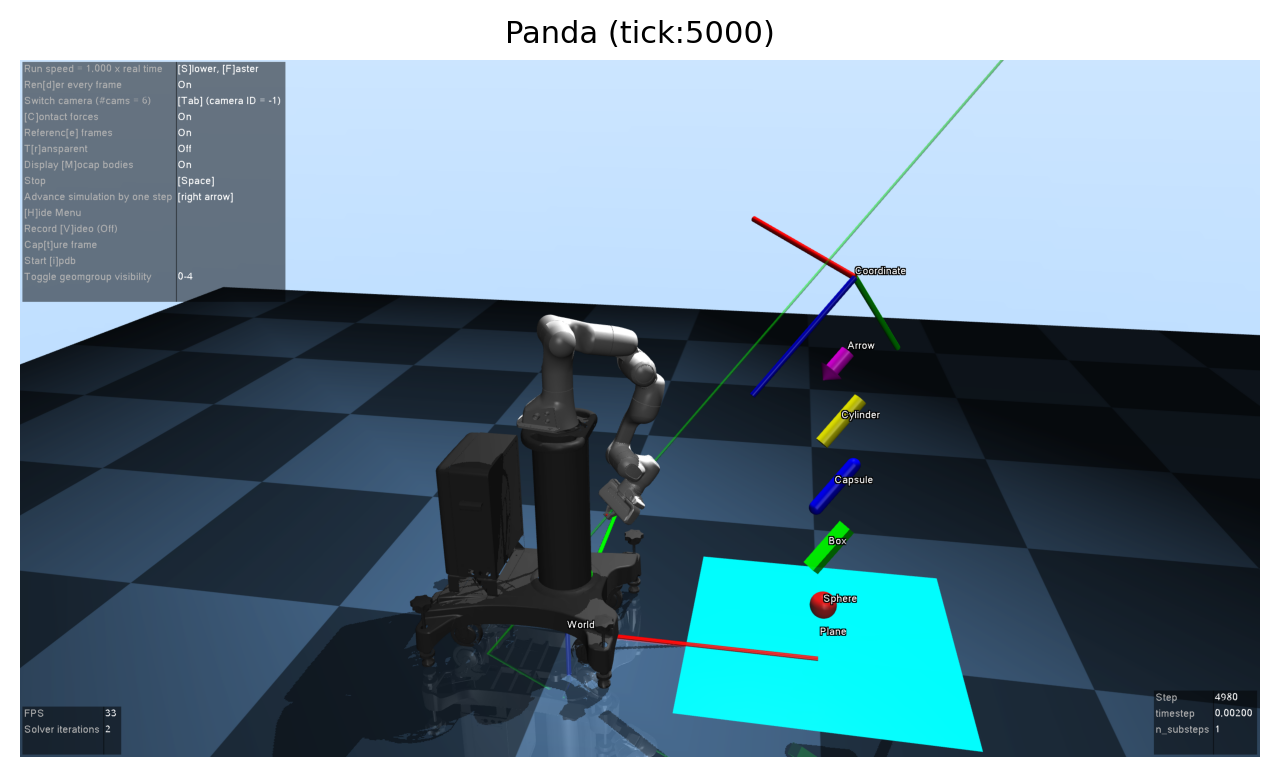

In [6]:
env.plot_scene(figsize=(8,5),render_expand=2.0,title_str='Panda (tick:%d)'%(env.tick),title_fs=11)

### Render

In [7]:
env.init_viewer(window_width=0.5,window_height=0.5,
                cam_azimuth=80.0,cam_distance=3.0,
                cam_elevation=-30.0,cam_lookat=np.array([0,0,1.5]))
env.reset()
max_tick = 2000
while env.tick < max_tick:
    env.step()
    env.render()
print ("Done.")

Done.


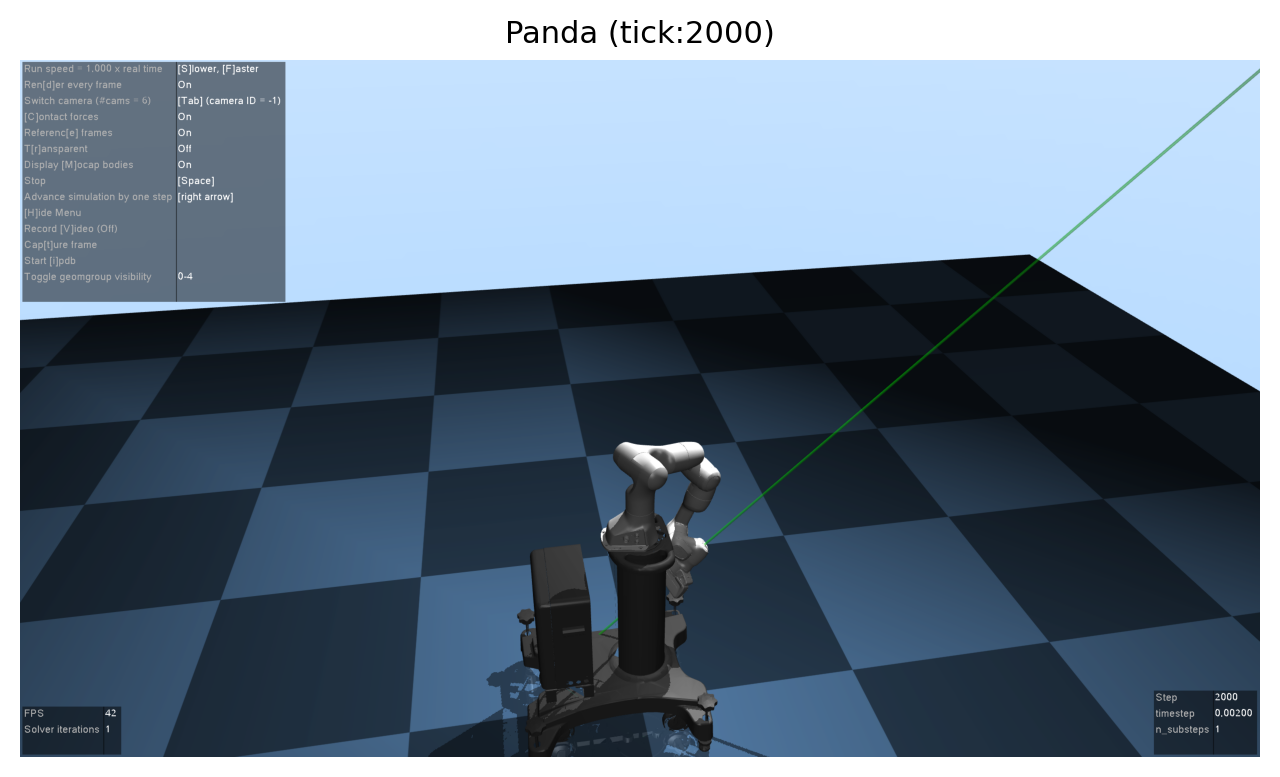

In [8]:
env.forward_renders()
env.plot_scene(figsize=(8,5),render_expand=2.0,title_str='Panda (tick:%d)'%(env.tick),title_fs=11)

### Get viewer information

In [9]:
viewer_info = env.get_viewer_info()
print (viewer_info)

{'cam_azimuth': 80.0, 'cam_distance': 3.0, 'cam_elevation': -30.0, 'cam_lookat': array([0. , 0. , 1.5])}


### Render again with restoring previous viewer information 

In [10]:
env.init_viewer(window_width=0.5,window_height=0.5,
                cam_azimuth=viewer_info['cam_azimuth'],cam_distance=viewer_info['cam_distance'],
                cam_elevation=viewer_info['cam_elevation'],cam_lookat=viewer_info['cam_lookat']
               )
env.reset()
max_tick = 2000
while env.tick < max_tick:
    env.step()
    env.render()
print ("Done.")

Done.


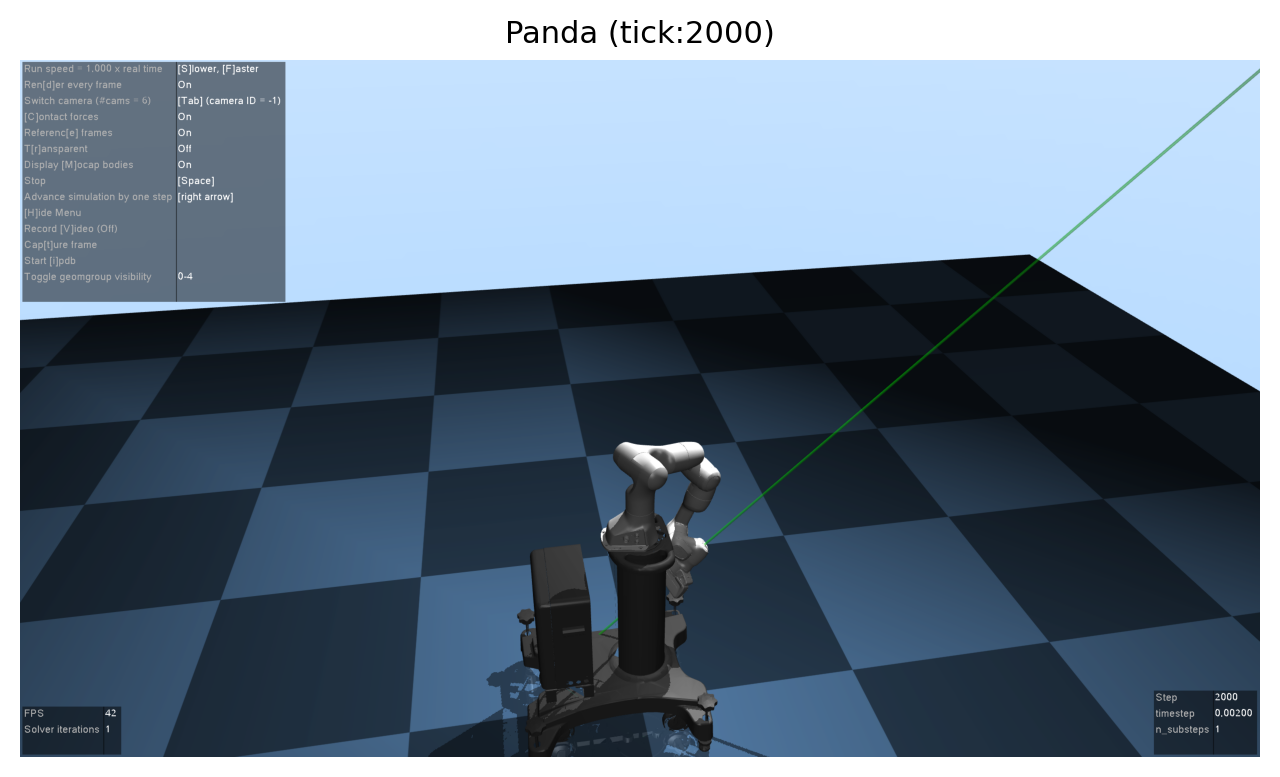

In [11]:
env.forward_renders()
env.plot_scene(figsize=(8,5),render_expand=2.0,title_str='Panda (tick:%d)'%(env.tick),title_fs=11)